<a href="https://colab.research.google.com/github/atnawshin/Machine-Learning/blob/main/Tf_idf_on_Bangla_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bnlp_toolkit

In [ ]:
pip install bangla

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/My Drive/Colab Notebooks/NLP Projects/Sentiment Analysis/' 
stopwords_list = path+'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
import pandas as pd

data = pd.read_excel('Cricket.xlsx' )

data.head()

,Source,Date,Text,Category,Polarity
0,BBC Bangla,2018-06-03 00:00:00,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,other,positive
1,BBC Bangla,2018-06-04 00:00:00,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,team,positive
2,BBC Bangla,15/6/2017,বাংলাদেশের পরে ভারতের সাপর্ট ই করি ?,team,positive
3,BBC Bangla,15/6/2020,সৌম্যকে বাদ দেওয়া হোক,batting,negative
4,BBC Bangla,27/1/2018,"প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবর...",team,positive


In [ ]:
#Data cleaning function
#removing unnecessary punctuation
def process_texts(Text): 
    Text = re.sub('[^\u0980-\u09FF]',' ',str(Text)) 
    return Text

In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['Text'].apply(process_texts)  

# print some cleaned reviews from the dataset
sample_data = [10,11,25,8,9,6]
for i in sample_data:
     print('Original:\n',data.Text[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Polarity[i],'\n')

Original:
 ,বাংলাদেশ জিদবে ইনশা আল্লাহ 
Cleaned:
  বাংলাদেশ জিদবে ইনশা আল্লাহ 
 Sentiment:--  positive 

Original:
 স্পিনারের সামনে নই রাজ্জাকের সামনে ধরাশায়ী র্রীলংকা 
Cleaned:
 স্পিনারের সামনে নই রাজ্জাকের সামনে ধরাশায়ী র্রীলংকা 
 Sentiment:--  positive 

Original:
 সিনিয়রদের এই ভুল গুলো মেনে নেওয়া যায়না।।।।। 
Cleaned:
 সিনিয়রদের এই ভুল গুলো মেনে নেওয়া যায়না      
 Sentiment:--  negative 

Original:
 ,বাংলাদেশ জিদবে ইনশা আল্লাহ 
Cleaned:
  বাংলাদেশ জিদবে ইনশা আল্লাহ 
 Sentiment:--  positive 

Original:
 ক্রিকেটে ভারত একটা অসভ্য দল,বিরাট কোহলির আচরনে স্পষ্ট ফুটে উঠে। 
Cleaned:
 ক্রিকেটে ভারত একটা অসভ্য দল বিরাট কোহলির আচরনে স্পষ্ট ফুটে উঠে  
 Sentiment:--  negative 

Original:
  মুসফিক আর তামিমের বেটিং তান্ড়বে কুহিলির জিব্বহাটা শুকিয়ে গেছে গরুর মুত খাওয়ার জন্য 
Cleaned:
  মুসফিক আর তামিমের বেটিং তান্ড়বে কুহিলির জিব্বহাটা শুকিয়ে গেছে গরুর মুত খাওয়ার জন্য 
 Sentiment:--  negative 



In [ ]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 6 Small Reviews 
Total Reviews: 2973


In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Polarity.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Polarity==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Polarity==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Polarity==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  negative
Number of Documents:2149
Number of Words:23700
Number of Unique Words:5889
Most Frequent Words:

না	443
আর	228
করে	205
কি	204
এই	191
বাংলাদেশ	190
কে	165
হয়	148
হবে	139
জন্য	122

Class Name :  positive
Number of Documents:565
Number of Words:5078
Number of Unique Words:1858
Most Frequent Words:

রাজ্জাক	79
জন্য	59
বাংলাদেশ	51
কে	42
ভালো	42
না	42
অনেক	36
ভাল	36
দলে	34
বাংলাদেশের	32

Class Name :  neutral
Number of Documents:259
Number of Words:2467
Number of Unique Words:1242
Most Frequent Words:

না	39
কি	22
বাংলাদেশ	18
খেলা	18
রাজ্জাক	18
হবে	18
করে	18
আছে	17
এই	16
আর	14
Total Number of Unique Words:6954


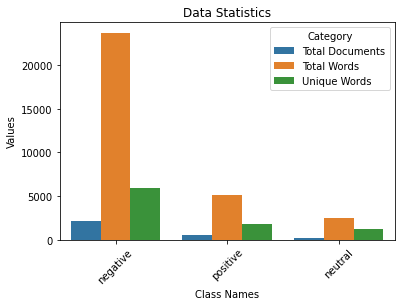

In [ ]:
#visualization
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

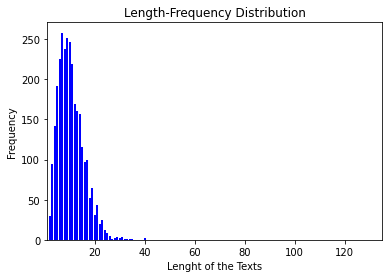

Maximum Length of a review: 40
Minimum Length of a review: 2
Average Length of a reviews: 11.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
";".join(stopwords.words('bengali'))
stop_words=set(stopwords.words('bengali'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stop(x):
    return ",".join([word for word in str(x).split() if word not in stop_words])
data['Text']=data['Text'].apply(lambda x : remove_stop(x))

In [ ]:
data.head()

,Source,Date,Text,Category,Polarity,cleaned,length
0,BBC Bangla,2018-06-03 00:00:00,"জয়,বাংলা,কাপ!,স্বাধীনতার,মাস,মার্চে।,মাথা,চমৎক...",other,positive,জয় বাংলা কাপ তাও আবার স্বাধীনতার মাস মার্চে ...,17
1,BBC Bangla,2018-06-04 00:00:00,"জয়,বাংলা,কাপ!,স্বাধীনতার,মাস,মার্চে।,মাথা,চমৎক...",team,positive,জয় বাংলা কাপ তাও আবার স্বাধীনতার মাস মার্চে ...,17
2,BBC Bangla,15/6/2017,"বাংলাদেশের,ভারতের,সাপর্ট,?",team,positive,বাংলাদেশের পরে ভারতের সাপর্ট ই করি,6
3,BBC Bangla,15/6/2020,"সৌম্যকে,বাদ",batting,negative,সৌম্যকে বাদ দেওয়া হোক,4
4,BBC Bangla,27/1/2018,"প্রথমটি,হচ্ছে,,কোচ,অত:পর,সাকিব,সাকিব,সাকিবরে,দলে",team,positive,প্রথমটি হচ্ছে কোচ অত পর সাকিব সাকিব আর সাকিবর...,11


In [ ]:
#remove emojis
import string
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F" #emoticons
        u"\U0001F300-\U0001F5FF" #symbols & pictographs
        u"\U0001F680-\U0001F6FF" #transport & map symbols
        u"\U0001F1E0-\U0001F1FF" #flags(ios)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251" 
        "]+",
        flags=re.UNICODE, 
    )
    return emoji_pattern.sub(r"",string)

In [ ]:
data['Text'] = data['Text'].astype(str)
data['Text'] = data['Text'].apply(lambda x:remove_emoji(x))
data.to_csv('output.csv',index=False, encoding='utf-8')

In [ ]:
data.head()

,Source,Date,Text,Category,Polarity,cleaned,length
0,BBC Bangla,2018-06-03 00:00:00,"জয়,বাংলা,কাপ!,স্বাধীনতার,মাস,মার্চে।,মাথা,চমৎক...",other,positive,জয় বাংলা কাপ তাও আবার স্বাধীনতার মাস মার্চে ...,17
1,BBC Bangla,2018-06-04 00:00:00,"জয়,বাংলা,কাপ!,স্বাধীনতার,মাস,মার্চে।,মাথা,চমৎক...",team,positive,জয় বাংলা কাপ তাও আবার স্বাধীনতার মাস মার্চে ...,17
2,BBC Bangla,15/6/2017,"বাংলাদেশের,ভারতের,সাপর্ট,?",team,positive,বাংলাদেশের পরে ভারতের সাপর্ট ই করি,6
3,BBC Bangla,15/6/2020,"সৌম্যকে,বাদ",batting,negative,সৌম্যকে বাদ দেওয়া হোক,4
4,BBC Bangla,27/1/2018,"প্রথমটি,হচ্ছে,,কোচ,অত:পর,সাকিব,সাকিব,সাকিবরে,দলে",team,positive,প্রথমটি হচ্ছে কোচ অত পর সাকিব সাকিব আর সাকিবর...,11


In [ ]:
#model building
positive = dataset[dataset.Polarity == 'positive']
negative = dataset[dataset.Polarity == 'negative']
dataset = positive.append(negative,ignore_index=True)
dataset.Polarity.value_counts()

negative    2149
positive     565
Name: Polarity, dtype: int64

In [ ]:
#Label Encodin and Dataset Splitting
################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [ ]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

In [ ]:
#Model Building Using Machine Learning Feature Extraction Using TF-IDF
#======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
#============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    
    return my_dict  

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================
            
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [ ]:
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Polarity,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)

Feature Size :======> 6582

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2714 
	Training		 2442 
	Test			 272
Feature Size :======> 26284

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2714 
	Training		 2442 
	Test			 272


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature Size :======> 46384

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2714 
	Training		 2442 
	Test			 272


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     83.82      92.31   21.82     35.29          LR
1     80.88      52.94   49.09     50.94          DT
2     84.93      76.92   36.36     49.38          RF
3     79.78      50.00   43.64     46.60         MNB
4     80.88      52.83   50.91     51.85         KNN
5     80.51     100.00    3.64      7.02  Linear SVM
6     81.99      87.50   12.73     22.22     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by RF at = 84.93
Highest F1-Score achieved by KNN at = 51.849999999999994
Highest Precision Score achieved by Linear SVM at = 100.0
Highest Recall Score achieved by KNN at = 50.91

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     80.88     100.00    5.45     10.34          LR
1     75.00      37.74   36.36     37.04          DT
2     84.93      79.17   34.55     48.10        

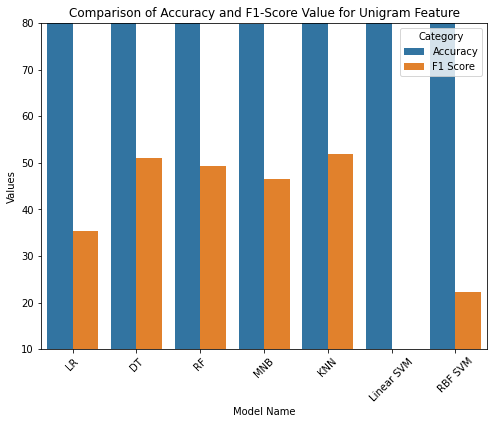

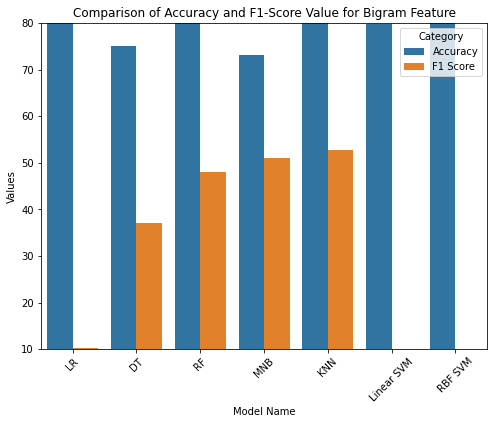

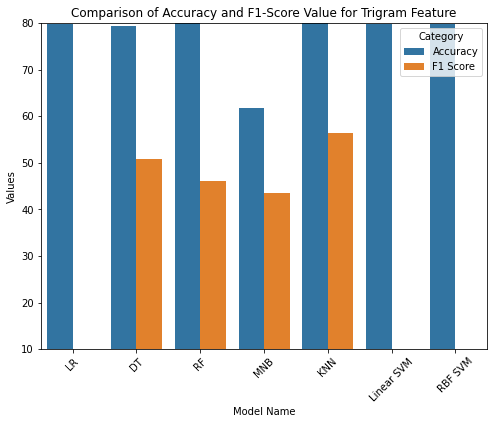

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);